# Analsyis of Triboelectric Nanogenerators (TENGs) output voltage


Triboelectric Nanogenerators (TENGs) are mechanical to electric energy converters and ideal candidates for exploiting the wasted energy from natural cyclic movements of the human body. TENGs are composed of one or two dielectric layers that are often a polymer or a polymer composite, and an electrive conductive element that drives charges through the external circuit. The presence of conductive particles in the polymer matrix increases the interfacial polarization and enhances the overall capacity of the system. For this reason, conductive carbon fiber particles have been employed in the triboelectric matrix of TENGs for enhancing its surface charge den-sity.


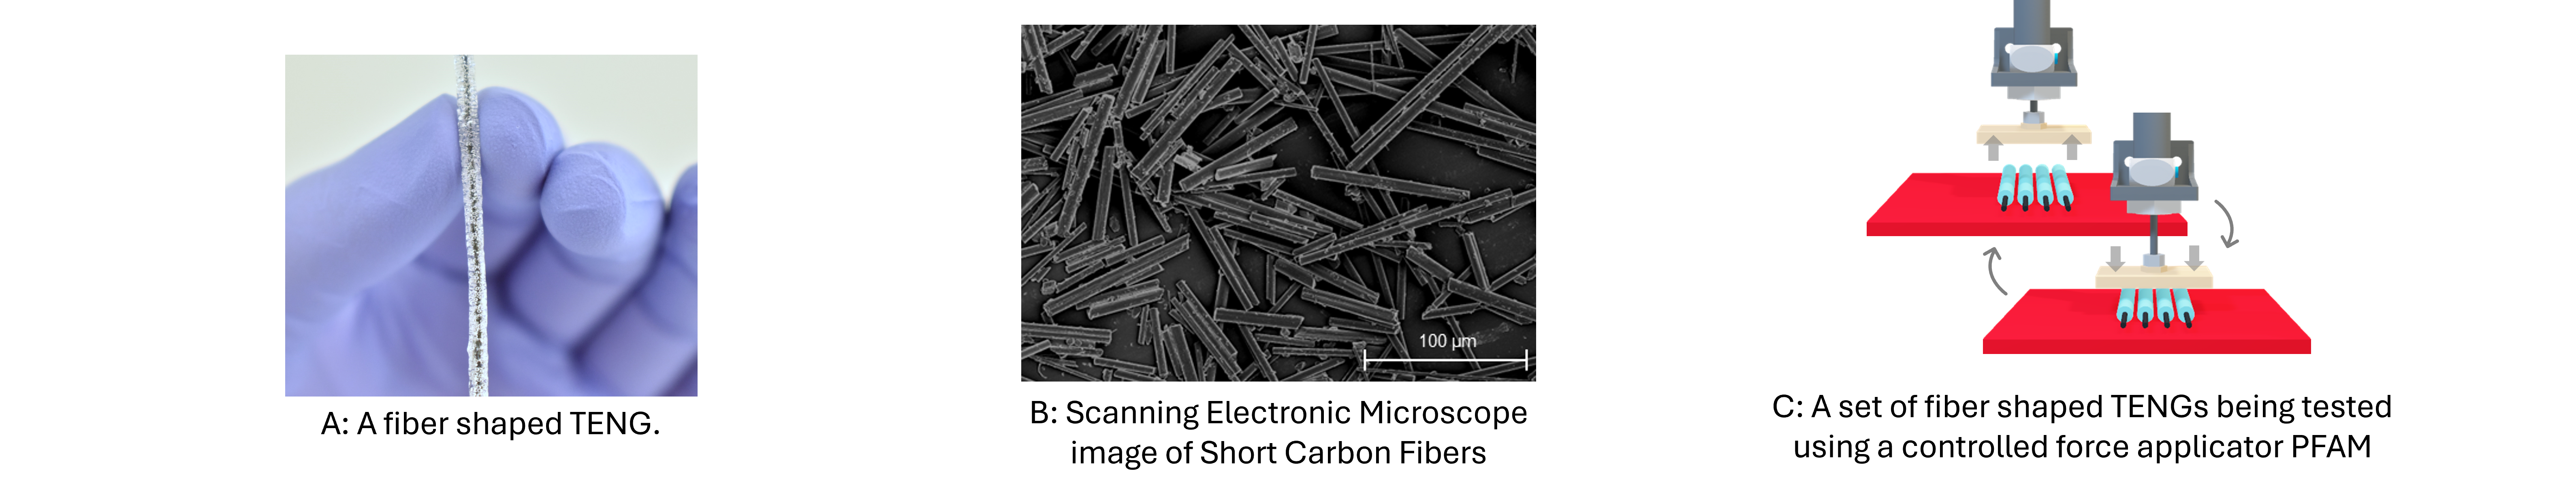

## Summary


This report investigates the performance optimization of a triboelectric nanogenerator (TENG) by analyzing key factors influencing its output. The objectives include determining the optimal carbon fiber (CF) loading, assessing the effects of tapping force and frequency on voltage output, evaluating voltage stability over time, and identifying the maximum power output across various load resistances. To test the devices, a pneumatic force applicator machine was used (PFAM).

The study found that the optimal CF loading concentration is 2% by weight. Tapping forces between 30N and 60N significantly enhance voltage generation, while increasing the tapping frequency slightly raises voltage output, peaking at 2 Hz. The TENG demonstrates charge accumulation in the initial seconds of operation, achieving stable voltage output for the remainder of the study period (up to 5400 seconds). The maximum power output of 276.44 µW was achieved using a 20 MΩ load resistor under conditions of 30N force and 0.2 Hz frequency, highlighting the potential for fine-tuning these parameters to optimize performance.

> More information on the **ouput voltage of TENGs** can be found [here](https://github.com/raquelbarras/Triboelectric_projects/blob/main/Voltage_Peak_Analysis.ipynb).
> 
>  More information on **Single electrode linear shaped TENGs** can be found [here](https://run.unl.pt/handle/10362/162994).
> 
>  More information about **PFAM** can be found [here](https://custom-prolabtools.blogspot.com/p/pneumatic-force-applicator-machine-pfam.html) and [here](https://github.com/raquelbarras/Triboelectric_projects/blob/main/PFAM_force_measurement.ipynb).

## Objectives

Here is a list of how the report main objectives, and how its structured:

1. Find the optimal CF loading content.
2. Study the influence of tapping force on output voltage.
3. Study the influence of frequency at a fixed tapping force on output voltage.
4. Study the output voltage stability over time.
5. Calculate the maximum power output vs loading resistor.

    Note: All images are my own design.

### 1. Find the optimal CF loading content: Voltage vs CF Loading content

The power generation capacity of a TENG is intricately tied to the electrical characteristics of the dielectric material, which undergo modifications as the loading of CFs is increased. The presence of conductive particles randomly dispersed in the PDMS matrix promotes electron charging at interfaces between the insulating PDMS matrix and conductive filler.

The output voltage from TENGs with diferent CF loadings are compared to find the optimal CF content.

1. Import the data.
2. Calculate Vpp
3. Calculate average and standad deviation Vpp values
4. Plot the values and find the optimal loading concentration.

In [2]:
import pandas as pd

In [3]:
path_loading = "C:/Users/Utilizador/Documents/GitHub/PhD_reports/TENG_output/CFLoading_Voltage.xlsx"

In [4]:
Loading_df = pd.read_excel(path_loading)
Loading_df

L0+  Unnamed: 1  L01+  Unnamed: 3  L05+  Unnamed: 5   L1+  Unnamed: 7  \
0  18.8         8.0  23.6         8.0  28.4        11.2  28.0        16.4   
1  19.4         8.2  23.2        10.4  29.2        12.0  29.6        16.4   
2  19.2         7.2  22.4        11.2  28.4        12.4  28.8        16.0   
3  18.4         7.0  20.0        11.2  29.2        12.8  29.2        17.2   
4  19.0         7.2  22.0        11.2  28.0        12.8  27.2        16.0   

    L2+  Unnamed: 9   L5+  Unnamed: 11  L10+  Unnamed: 13  L15+  Unnamed: 15  \
0  32.0        27.2  24.0         20.0  20.0          9.0  12.2          7.4   
1  32.4        26.8  29.2         16.8  19.6          9.6  13.4          7.4   
2  31.2        27.2  22.8         16.4  18.6          9.5  13.6          7.4   
3  31.2        26.8  21.6         16.4  19.2          9.6  13.4          6.8   
4  30.0        26.0  24.8         16.8  19.8          9.4  13.2          6.2   

   L20+  Unnamed: 17  L30+  Unnamed: 19  
0  11.4          5.8   9.8          5.6  
1  10.4          5.8   9.2          5.8  
2   9.6          7.4   9.4          5.6  
3   9.4          8.0   8.6          5.8  
4  10.4          5.8   9.2          5.8

In [5]:
vpp = pd.DataFrame()

for i in range(1, len(Loading_df.columns), 2):  # iterate through odd columns (1, 3, 5...)
    column_sum = Loading_df.iloc[:, i] + Loading_df.iloc[:, i - 1]  # Sum odd and preceding even column
    vpp[f'Vpp_{(i - 1) // 2}'] = column_sum  # Assign to vpp with a meaningful column name

vpp

Vpp_0  Vpp_1  Vpp_2  Vpp_3  Vpp_4  Vpp_5  Vpp_6  Vpp_7  Vpp_8  Vpp_9
0   26.8   31.6   39.6   44.4   59.2   44.0   29.0   19.6   17.2   15.4
1   27.6   33.6   41.2   46.0   59.2   46.0   29.2   20.8   16.2   15.0
2   26.4   33.6   40.8   44.8   58.4   39.2   28.1   21.0   17.0   15.0
3   25.4   31.2   42.0   46.4   58.0   38.0   28.8   20.2   17.4   14.4
4   26.2   33.2   40.8   43.2   56.0   41.6   29.2   19.4   16.2   15.0

In [6]:
average_vpp = pd.DataFrame(columns = ['Loading (%)', 'mean_Vpp', 'std_Vpp'])
loading_names = ["0", "0.1", "0.5", "1", "2", "5", "10", "15", "20", "30"]

average_vpp['Loading (%)'] = loading_names

for i in range(len(vpp.columns)):
    avg = vpp.iloc[:,i].mean()
    st_dev = vpp.iloc[:,i].std()
    average_vpp.loc[i, ['mean_Vpp', 'std_Vpp']] = [avg, st_dev]

average_vpp

Loading (%) mean_Vpp   std_Vpp
0           0    26.48  0.807465
1         0.1    32.64  1.152389
2         0.5    40.88  0.867179
3           1    44.96  1.283745
4           2    58.16  1.314534
5           5    41.76  3.305753
6          10    28.86   0.45607
7          15     20.2  0.707107
8          20     16.8  0.565685
9          30    14.96  0.357771

In [7]:
print(average_vpp.dtypes)

Loading (%)    object
mean_Vpp       object
std_Vpp        object
dtype: object


In [8]:
average_vpp = average_vpp.astype(float)
print(average_vpp.dtypes)

Loading (%)    float64
mean_Vpp       float64
std_Vpp        float64
dtype: object


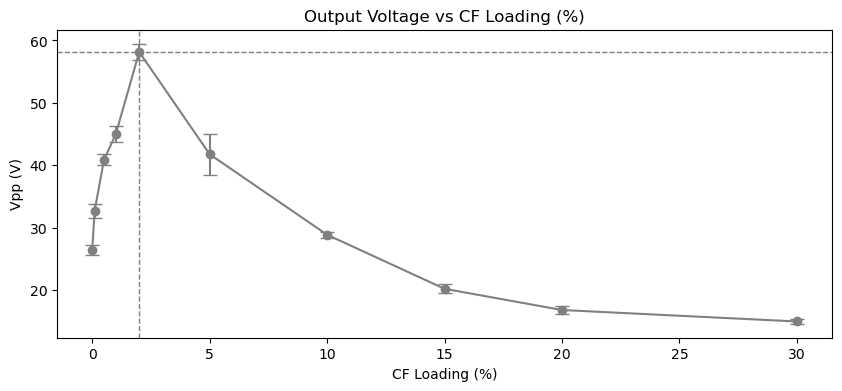

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(average_vpp['Loading (%)'], average_vpp['mean_Vpp'], color='grey')
plt.errorbar(x=average_vpp['Loading (%)'], y=average_vpp['mean_Vpp'], yerr=average_vpp['std_Vpp'], color='grey', fmt='o', capsize=5)

plt.xlabel('CF Loading (%)')
plt.ylabel('Vpp (V)')
plt.title('Output Voltage vs CF Loading (%)')

plt.axvline(x=2, color='grey', linestyle='--', linewidth=1)
plt.axhline(y=58.15, color='grey', linestyle='--', linewidth=1)

plt.show()

### Remarks:

- The increase of the cCFs loading ratio results in a noticeable rise on Vpp.
- Vpp reaches its maximum value at the 2% loading mark, with a value of 58.16 V.
- Further increasing the loading ratio after the 2% mark resuts in a voltage decline.
- The Vpp reaches its lowest value at 30 % wt. load ratio.

The loading with cCFs enhances the power conversion capacity of TENGs by improving the charge storage capacity. However, because CFs are electricaly conductive particles, they also modify the conductivity of the matrix they are embeded in.

> The critical concentration upon which the polymer becomes electrically conductive restricts the maximum loading.


When the composite becomes electrically conductive, the charges formed at the PDMS interface are easily dissipated from the bulk composite into the electrodes, which undermines the process of electrical induction at the external electrodes and causes a decline in the power conversion.



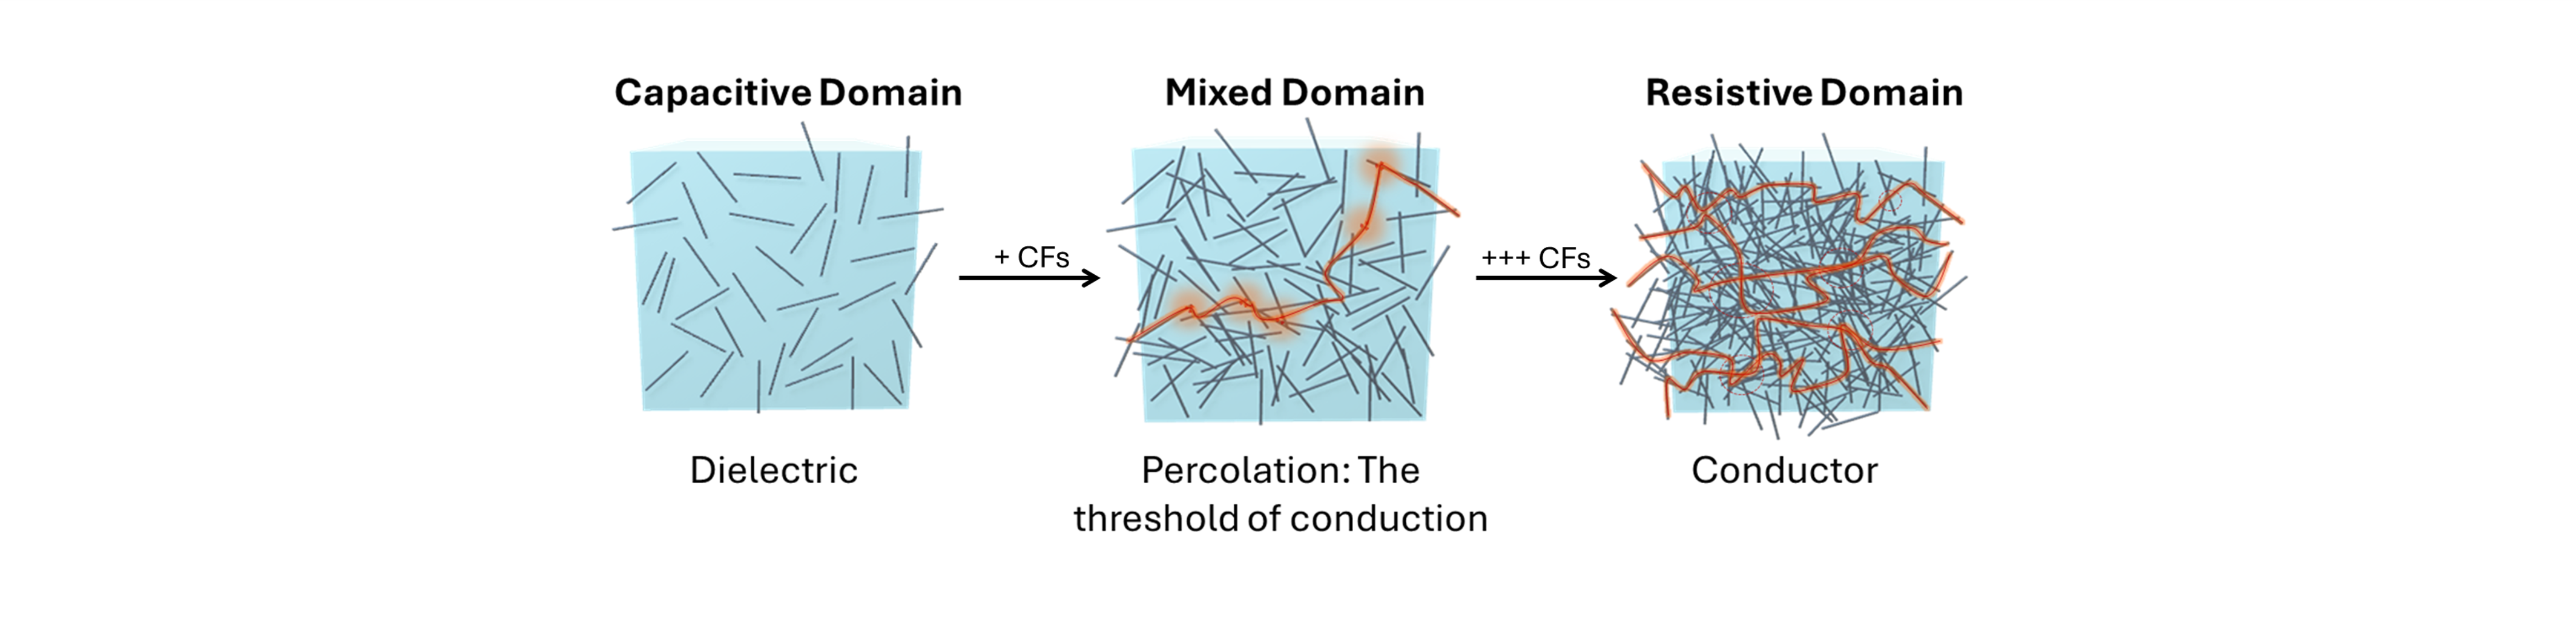

### 2. Study the influence of tapping force on output voltage.

Force vs Voltage of best performing TENG: 2% CF Loading

1. Import the data.
2. Calculate Vpp.
3. Calculate average and standad deviation Vpp values.
4. Plot the values and find trends.

In [10]:
path_force = "C:/Users/Utilizador/Documents/GitHub/PhD_reports/TENG_output/Force_Voltage.xlsx"

force_df = pd.read_excel(path_force)
force_df

30N+  Unnamed: 1  40N+  Unnamed: 3  50N+  Unnamed: 5  60N+  Unnamed: 7
0  28.8        26.0  39.2        30.0  44.0        31.6  48.8        36.0
1  32.0        25.2  38.4        31.2  44.8        33.6  50.4        36.8
2  32.0        26.8  40.8        30.8  44.4        34.0  48.0        34.4
3  30.8        26.4  40.8        31.2  45.2        34.8  49.6        35.2
4  29.6        27.6  41.6        30.4  46.4        32.4  48.0        37.6

In [11]:
#create a dataframe with Vpp values - sum of positive and negative peaks from force_df
vpp_force_df = pd.DataFrame()

for i in range(1, len(force_df.columns), 2):  # iterate through odd columns (1, 3, 5...)
    column_sum = force_df.iloc[:, i] + force_df.iloc[:, i - 1]  # Sum odd and preceding even column
    vpp_force_df[f'Vpp_{(i - 1) // 2}'] = column_sum  # Assign to vpp with a meaningful column name

vpp_force_df

Vpp_0  Vpp_1  Vpp_2  Vpp_3
0   54.8   69.2   75.6   84.8
1   57.2   69.6   78.4   87.2
2   58.8   71.6   78.4   82.4
3   57.2   72.0   80.0   84.8
4   57.2   72.0   78.8   85.6

In [12]:
force_vpp = pd.DataFrame(columns = ['Force (N)', 'mean_Vpp', 'std_Vpp'])
force_names = ["30", "40", "50", "60"]

force_vpp['Force (N)'] = force_names

for i in range(len(vpp_force_df.columns)):
    avg = vpp_force_df.iloc[:,i].mean()
    st_dev = vpp_force_df.iloc[:,i].std()
    force_vpp.loc[i, ['mean_Vpp', 'std_Vpp']] = [avg, st_dev]

force_vpp

Force (N) mean_Vpp   std_Vpp
0        30    57.04  1.431084
1        40    70.88  1.368211
2        50    78.24   1.61493
3        60    84.96  1.734359

In [13]:
print(force_vpp.dtypes)

Force (N)    object
mean_Vpp     object
std_Vpp      object
dtype: object


In [14]:
force_vpp = force_vpp.astype(float)
print(force_vpp.dtypes)

Force (N)    float64
mean_Vpp     float64
std_Vpp      float64
dtype: object


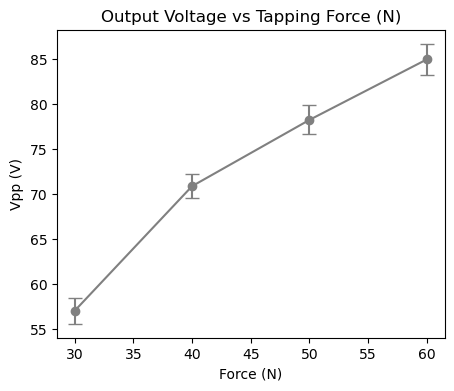

In [15]:
plt.figure(figsize=(5, 4))
plt.plot(force_vpp['Force (N)'], force_vpp['mean_Vpp'], color='grey')
plt.errorbar(x=force_vpp['Force (N)'], y=force_vpp['mean_Vpp'], yerr=force_vpp['std_Vpp'], color='grey', fmt='o', capsize=5)

plt.xlabel('Force (N)')
plt.ylabel('Vpp (V)')
plt.title('Output Voltage vs Tapping Force (N)')

plt.show()

### Remarks


The output voltage increases at an aproximatly linear pace for increasing tapping forces in the range from 30 to 60 N.

Although aproximatly linear, a decreasing slope with increasing pressure may indicate a degradation mechanism in the power conversion process.

Compressing the composite brings the conductive particles closer together, increasing the likelihood of percolation. The  formation of aditional conductive paths under compression promotes charge dissipation and can undermine the process of electricla induction.


### 3. Study the influence of frequency at a fixed tapping force on output voltage.

Frequency vs Voltage of best performing TENG: 2% CF Loading

1. Import the data.
2. Calculate Vpp.
3. Calculate average and standard deviation Vpp values.
4. Plot the Vpp vs frequency.

In [16]:
path_freq = "C:/Users/Utilizador/Documents/GitHub/PhD_reports/TENG_output/frequency_voltage.xlsx"

freq_df = pd.read_excel(path_freq)
freq_df

05Hz  Unnamed: 1  1Hz+  Unnamed: 3  2Hz+  Unnamed: 5  3Hz+  Unnamed: 7
0  28.0        21.2  29.6        26.4  32.0        22.4  34.4        19.2
1  28.4        20.4  29.6        22.4  32.4        22.0  34.4        19.6
2  28.4        19.6  30.0        22.0  31.6        22.0  33.6        18.4
3  27.2        19.6  28.8        21.6  32.4        24.4  36.0        19.2
4  26.8        20.4  29.6        21.6  30.4        22.0  33.6        18.0

In [17]:
#create a dataframe with Vpp values - sum of positive and negative peaks from force_df
vpp_freq_df = pd.DataFrame()

for i in range(1, len(freq_df.columns), 2):  # iterate through odd columns (1, 3, 5...)
    column_sum = freq_df.iloc[:, i] + freq_df.iloc[:, i - 1]  # Sum odd and preceding even column
    vpp_freq_df[f'Vpp_{(i - 1) // 2}'] = column_sum  # Assign to vpp with a meaningful column name

vpp_freq_df

Vpp_0  Vpp_1  Vpp_2  Vpp_3
0   49.2   56.0   54.4   53.6
1   48.8   52.0   54.4   54.0
2   48.0   52.0   53.6   52.0
3   46.8   50.4   56.8   55.2
4   47.2   51.2   52.4   51.6

In [18]:
freq_vpp = pd.DataFrame(columns = ['Freq (Hz)', 'mean_Vpp', 'std_Vpp'])
freq_names = ["0.5", "1", "2", "3"]

freq_vpp['Freq (Hz)'] = freq_names

for i in range(len(vpp_freq_df.columns)):
    avg = vpp_freq_df.iloc[:,i].mean()
    st_dev = vpp_freq_df.iloc[:,i].std()
    freq_vpp.loc[i, ['mean_Vpp', 'std_Vpp']] = [avg, st_dev]

freq_vpp

Freq (Hz) mean_Vpp   std_Vpp
0       0.5     48.0  1.019804
1         1    52.32  2.161481
2         2    54.32  1.609969
3         3    53.28   1.48054

In [19]:
print(freq_vpp.dtypes)

Freq (Hz)    object
mean_Vpp     object
std_Vpp      object
dtype: object


In [20]:
freq_vpp = freq_vpp.astype(float)
print(freq_vpp.dtypes)

Freq (Hz)    float64
mean_Vpp     float64
std_Vpp      float64
dtype: object


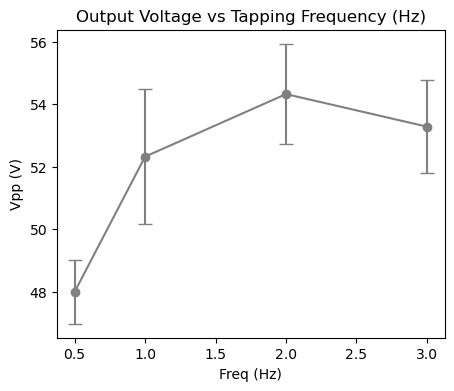

In [21]:
plt.figure(figsize=(5, 4))
plt.plot(freq_vpp['Freq (Hz)'], freq_vpp['mean_Vpp'], color='grey')
plt.errorbar(x=freq_vpp['Freq (Hz)'], y=freq_vpp['mean_Vpp'], yerr=freq_vpp['std_Vpp'], color='grey', fmt='o', capsize=5)

plt.xlabel('Freq (Hz)')
plt.ylabel('Vpp (V)')
plt.title('Output Voltage vs Tapping Frequency (Hz)')

plt.show()

### Remarks:

The output voltage increases slightly with rising tapping frequencies and tends to stabilize at frequencies above 2 Hz.


Surface charges dissipate over time, so reducing the interval between charge generation cycles (by increasing the tapping frequency) promotes charge accumulation and enhances overall electrical power conversion efficiency.


However, the surface's charge storage capacity is limited by various factors, leading to a plateau in output voltage beyond 2 Hz.

### 4. Study the output voltage stability over time

Time vs Voltage of best performing TENG: 2% CF Loading

1. Import the data.
2. Calculate Vpp.
4. Plot the Vpp vs time

In [22]:
path_time = "C:/Users/Utilizador/Documents/GitHub/PhD_reports/TENG_output/time_voltage.xlsx"
time_df = pd.read_excel(path_time)
time_df

1  Unnamed: 1     5  Unnamed: 3  10  Unnamed: 5    15  Unnamed: 7    20  \
0  2.8         3.6  12.4         7.6  14          10  15.6          12  16.8   

   Unnamed: 9  ...  3000  Unnamed: 39  3600  Unnamed: 41  4200  Unnamed: 43  \
0        13.6  ...  22.8           14  22.8         13.6    24         15.2   

   4800  Unnamed: 45  5400  Unnamed: 47  
0  21.6         13.6  21.6         13.2  

[1 rows x 48 columns]

In [23]:
#create a dataframe with Vpp values - sum of positive and negative peaks from force_df
time_vpp = pd.DataFrame(columns = ['time', 'Vpp'])

for i in range(1, len(time_df.columns), 2):  # iterate through odd columns (1, 3, 5...)
    column_sum = time_df.iloc[0, i] + time_df.iloc[0, i - 1]  # Sum odd and preceding even column
    time_vpp.loc[i//2, 'time'] = time_df.columns[i-1]
    time_vpp.loc[i//2, 'Vpp'] = column_sum # Assign to vpp with a meaningful column name

time_vpp

time   Vpp
0      1   6.4
1      5  20.0
2     10    24
3     15  27.6
4     20  30.4
5     25  32.8
6     30  33.2
7     45  35.6
8     60  34.0
9     90  36.8
10   120  34.8
11   180  37.2
12   240  36.4
13   300  36.0
14   450  38.0
15   600  38.4
16  1200  36.8
17  1800  35.2
18  2400  38.8
19  3000  36.8
20  3600  36.4
21  4200  39.2
22  4800  35.2
23  5400  34.8

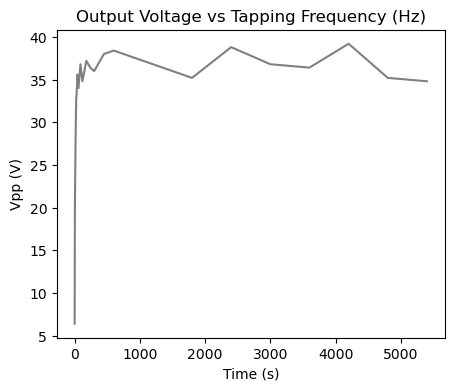

In [24]:
plt.figure(figsize=(5, 4))
plt.plot(time_vpp['time'], time_vpp['Vpp'], color='grey')

plt.xlabel('Time (s)')
plt.ylabel('Vpp (V)')
plt.title('Output Voltage vs Tapping Frequency (Hz)')

plt.show()

### Remarks

The set stability was tested by measuring V while applying repeated impacts using PFAM at 30 N and 2 Hz during 5400 seconds (slightly more than 90 minutes). The voltage increased rapidly during the initial minutes as the charges accumulated at the PDMS surface and later stabilized around 40 V. The output was stable after being subjected to 10 000 impact cycles.

### 5. Calculate the maximum power output vs loading resistor.

Load Resistance vs Voltage of the best performing TENG: 2% CF Loading

1. Import the data.
2. Calculate Electrical Power.
4. Plot the Vpp, Current, Power vs Load Resistance.
5. Find the maximum power output and correspondent resistance value.

In [25]:
path_r = "C:/Users/Utilizador/Documents/GitHub/PhD_reports/TENG_output/Rload_VI.xlsx"
r_df = pd.read_excel(path_r)

r_df

Mohms      Vpp      uA
0    0.1   0.7216  8.9920
1    0.2   1.3056  8.9760
2    1.0   5.7600  8.8320
3    2.0  10.4960  8.9120
4    5.0  20.6400  8.5280
5   10.0  28.0000  8.4000
6   20.0  35.9200  7.6960
7   50.0  40.9600  5.6760
8  100.0  45.9200  4.4320
9  200.0  49.4400  3.3112

In [26]:
# calculate the power = voltage x current
r_df['uW'] = r_df['Vpp'] * r_df['uA']
r_df

Mohms      Vpp      uA          uW
0    0.1   0.7216  8.9920    6.488627
1    0.2   1.3056  8.9760   11.719066
2    1.0   5.7600  8.8320   50.872320
3    2.0  10.4960  8.9120   93.540352
4    5.0  20.6400  8.5280  176.017920
5   10.0  28.0000  8.4000  235.200000
6   20.0  35.9200  7.6960  276.440320
7   50.0  40.9600  5.6760  232.488960
8  100.0  45.9200  4.4320  203.517440
9  200.0  49.4400  3.3112  163.705728

Text(0.5, 1.0, 'V, I, P vs Load Resistance')

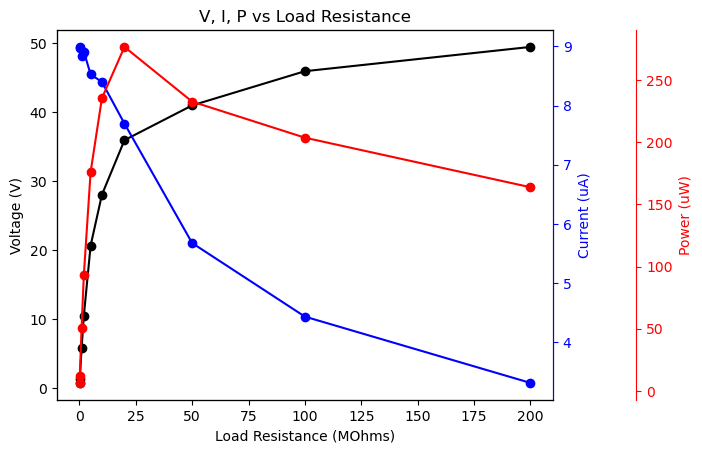

In [45]:
fig, ax1 = plt.subplots()

x= r_df['Mohms']
y= r_df['Vpp']
z= r_df['uA']
k= r_df['uW']

ax1.plot(x, y, color='black', marker='o', label='Vpp (V)')
ax1.set_xlabel('Load Resistance (MOhms)')
ax1.set_ylabel('Voltage (V)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.spines['right'].set_color('b')
ax2.plot(x, z, color='b', marker='o', label='Current (uA)')
ax2.set_ylabel('Current (uA)', color='b')
ax2.tick_params(axis='y', labelcolor='b', color='b')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset by 60 units
ax3.spines['right'].set_color('red')
ax3.plot(x, k, color='r', marker='o', label='Power (uW)')
ax3.set_ylabel('Power (uW)', color='r')
ax3.tick_params(axis='y', labelcolor='r', color='r')

plt.title('V, I, P vs Load Resistance')

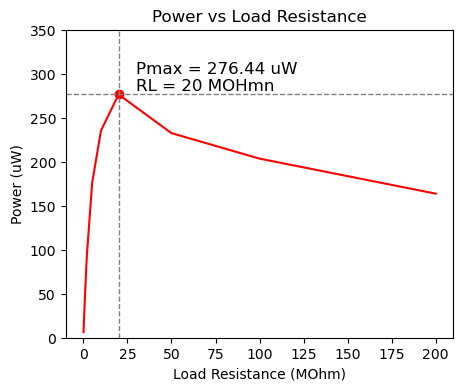

In [44]:
plt.figure(figsize=(5, 4))
plt.plot(x, k, color='red')
plt.ylim(0, 200)
plt.ylim(0, 350)

plt.text(x[k.idxmax()]+10, k.max()+1, f'Pmax = {k.max():.2f} uW\nRL = {x[k.idxmax()]:.0f} MOHmn', ha='left', va='bottom', fontsize=12)
plt.scatter(x[k.idxmax()], k.max(), color='r')

plt.xlabel('Load Resistance (MOhm)')
plt.ylabel('Power (uW)')
plt.title('Power vs Load Resistance')

plt.axvline(x=x[k.idxmax()], color='grey', linestyle='--', linewidth=1)
plt.axhline(y=k.max(), color='grey', linestyle='--', linewidth=1)

plt.show()

Voltage increases with the value of the load resistors and current decrease with the value of the load resistors. Power was calculated by the product of the two. The maximum value was found when using a 20 MΩ load resistor: 276.44 uW.



## Main Conclusions:

- The optimal loading concentration of Carbons Fibers is **2%** in weight.
- Tapping forces from 30N to 60N result in an increase of the voltage generated.
- Increasing the frequecy of tapping slightly increses the voltage generation until a maximum of 2Hz.
- The TENG acumulates charges in the initial seconds of tapping. Afterwards, the output is stable in the time inteval of study (5400 seconds).
- The maximum power output of **276.44 uW** was achieved when using a **20 MOhm** load resistor (tapping at F=30N, f=0.2Hz).